In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
ls ../dataset/1_iteration/

angularChannelValue.txt     channelMinCoefficient10.csv
channelCoefficient0.csv     channelMinCoefficient20.csv
channelCoefficient10.csv    channelMinCoefficient30.csv
channelCoefficient20.csv    channelMinCoefficient5.csv
channelCoefficient30.csv    maximumChannelCoefficient.csv
channelCoefficient5.csv     minimumChannelCoefficient.csv
channelMinCoefficient0.csv


In [3]:
def filter_dataset_20(data):
    '''Filtering the datasets into 20 sets of data.
    
    Parameter
    ---------
    data : Data source
    data_length : Length of data source
    
    Returns
    -------
    filtered_list : A list containing the filtered datasets
    '''
    data_length = len(data)
    filtered_list = np.array([])
    for index in np.arange(49, data_length + 1, 50):
        channel_coefficient = data[index]
        filtered_list = np.append(filtered_list, channel_coefficient)
    return filtered_list

In [4]:
maximum = np.genfromtxt('../dataset/1_iteration/maximumChannelCoefficient.csv')
b0 = np.genfromtxt('../dataset/1_iteration/channelCoefficient0.csv')
b5 = np.genfromtxt('../dataset/1_iteration/channelCoefficient5.csv')
b10 = np.genfromtxt('../dataset/1_iteration/channelCoefficient10.csv')
b20 = np.genfromtxt('../dataset/1_iteration/channelCoefficient20.csv')
b30 = np.genfromtxt('../dataset/1_iteration/channelCoefficient30.csv')

In [5]:
df = pd.DataFrame()
df['Path'] = np.arange(50, 1000 + 1, step=50)
df['Maximum'] = filter_dataset_20(maximum)
df['0'] = filter_dataset_20(b0)
df['5'] = filter_dataset_20(b5)
df['10'] = filter_dataset_20(b10)
df['20'] = filter_dataset_20(b20)
df['30'] = filter_dataset_20(b30)

In [6]:
df.head()

,Path,Maximum,0,5,10,20,30
0,50,2500.0,2500.0,2494.692156,2473.056757,2405.900869,2302.853421
1,100,10000.0,10000.0,9976.335112,9906.719161,9608.669517,9055.325469
2,150,22500.0,22500.0,22440.960271,22281.095078,21591.302663,20196.528436
3,200,40000.0,40000.0,39895.553969,39564.255703,38291.314904,36506.523370
4,250,62500.0,62500.0,62332.560348,61896.461940,59926.711464,56878.526464


<IPython.core.display.Javascript object>


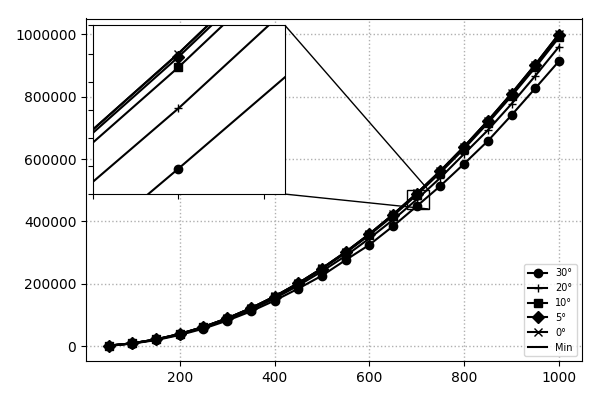

In [17]:
%matplotlib notebook
# plt.rc('font', size=12, family='Times New Roman', weight='light')

fig, channel = plt.subplots(figsize=(6, 4))

# channel.set_xlabel('Jumlah Jalur')
# channel.set_ylabel('Koefisien Kanal')
# channel.set_title('Koefisien Kanal Batas Atas')
channel.plot(df['Path'], df['30'], label='30°', marker='o', color='black')
channel.plot(df['Path'], df['20'], label='20°', marker='+', color='black')
channel.plot(df['Path'], df['10'], label='10°', marker='s', color='black')
channel.plot(df['Path'], df['5'], label='5°', marker='D', color='black')
channel.plot(df['Path'], df['0'], label='0°', marker='x', color='black')
channel.plot(df['Path'], df['Maximum'], label='Min', color='black')
channel.legend(loc=4, prop={'size': 7})
channel.grid(linewidth='1', linestyle=':')

ax = zoomed_inset_axes(channel, 9, loc=2)
ax.plot(df['Path'], df['30'], label='30°', marker='o', color='black')
ax.plot(df['Path'], df['20'], label='20°', marker='+', color='black')
ax.plot(df['Path'], df['10'], label='10°', marker='s', color='black')
ax.plot(df['Path'], df['5'], label='5°', marker='D', color='black')
ax.plot(df['Path'], df['0'], label='0°', marker='x', color='black')
ax.plot(df['Path'], df['Maximum'], label='Min', color='black')

x1, x2, y1, y2 = 680, 725, 440000, 500000
ax.set_xlim(x1, x2)
ax.set_ylim(y1, y2)

mark_inset(channel, ax, loc1=1, loc2=4)
plt.yticks(visible=False)
plt.xticks(visible=False)

plt.tight_layout()
plt.show()
plt.savefig('../images/20_paths_batas_atas_rev.png')

In [20]:
ls ../images

1000_iteration.png           maximum_1_iteration.png
20_paths_batas_atas.png      minimum_1000_iterations.png
20_paths_batas_atas_rev.png  minimum_1_iteration_clr.png
20_paths_batas_bawah.png     minimum_1_iteration.png
